In [1]:
#Practical 1c 
#Aim:- Perform Data Loading, Feature selection (Principal Component analysis) and Feature Scoring and Ranking 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
sms_data = [
 "Free entry in 2 a weekly competition to win FA Cup final tickets",
 "Hey, I will call you later. Don't forget to bring the document.",
 "Congratulations! You've won a free cruise to the Bahamas",
 "Hi there, can we meet tomorrow for lunch?",
 "URGENT! Your mobile number has won a $2000 prize!",
    "Reminder: Your appointment with the dentist is at 3 PM today.",
 "You have won a lottery! Claim your prize now by calling us.",
 "Are we still meeting at the coffee shop today?",
 "Exclusive deal just for you! Buy now and get 50% off!",
 "Can you send me the report by end of the day?"
]
sms_labels = [
 "spam", "ham", "spam", "ham", "spam",
 "ham", "spam", "ham", "spam", "ham"
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_data)
X_train, X_test, y_train, y_test = train_test_split(X, sms_labels, test_size=0.3,
random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print("Test Data:")
for doc, actual, predicted in zip(sms_data[len(sms_data) - len(y_test):], y_test,y_pred):
    print(f"Message: {doc}, Actual: {actual}, Predicted: {predicted}")

print(f"\nAccuracy: {accuracy:.2f}")
print(report)


Test Data:
Message: Are we still meeting at the coffee shop today?, Actual: spam, Predicted: ham
Message: Exclusive deal just for you! Buy now and get 50% off!, Actual: ham, Predicted: ham
Message: Can you send me the report by end of the day?, Actual: ham, Predicted: ham

Accuracy: 0.67
              precision    recall  f1-score   support

         ham       0.67      1.00      0.80         2
        spam       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Home\AppData\Local\Temp\ipykernel_9460\2703941225.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


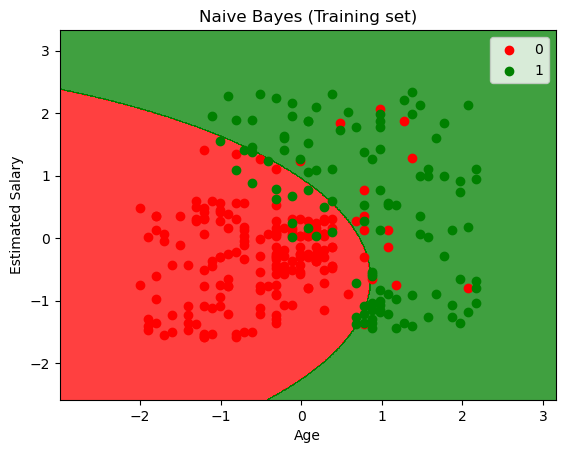

C:\Users\Home\AppData\Local\Temp\ipykernel_9460\2703941225.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


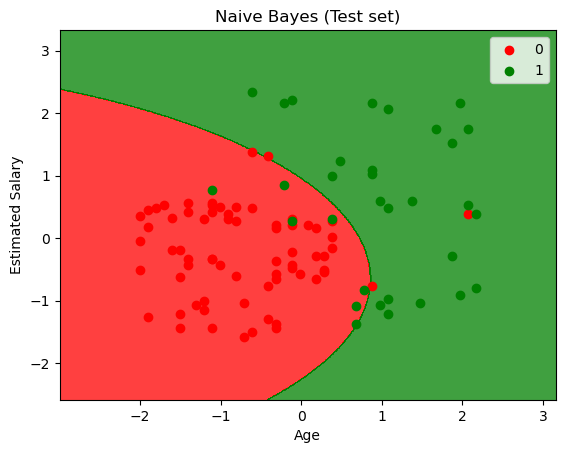

In [2]:
#Practical 2a 
#Aim:- Write a program to implement the naïve Bayesian classifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,
0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() +
1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() +
1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Decision Tree Accuracy: 0.6666666666666666
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.43      0.46      0.44        13
           2       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45



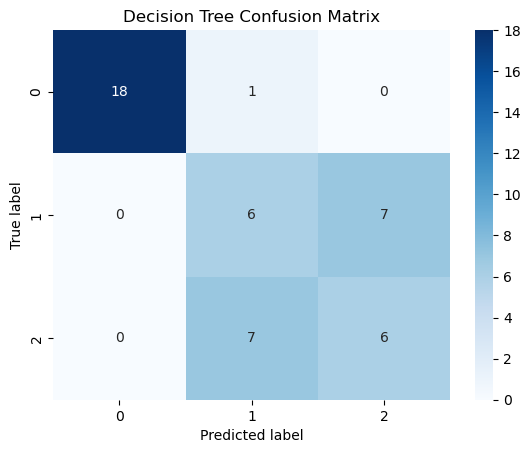

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


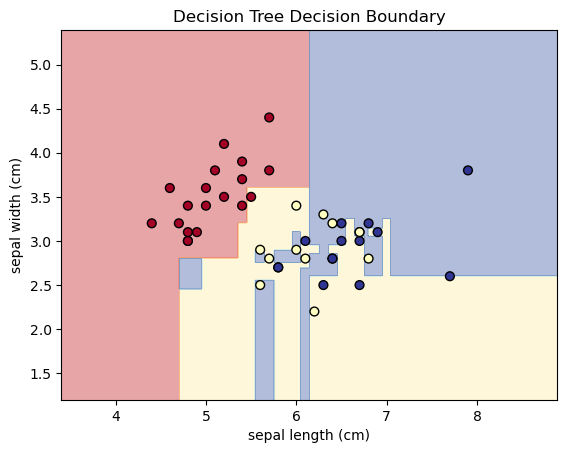

Random Forest Accuracy: 0.7555555555555555
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



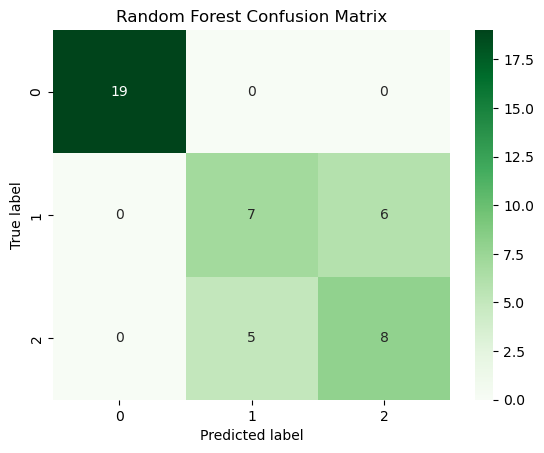

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


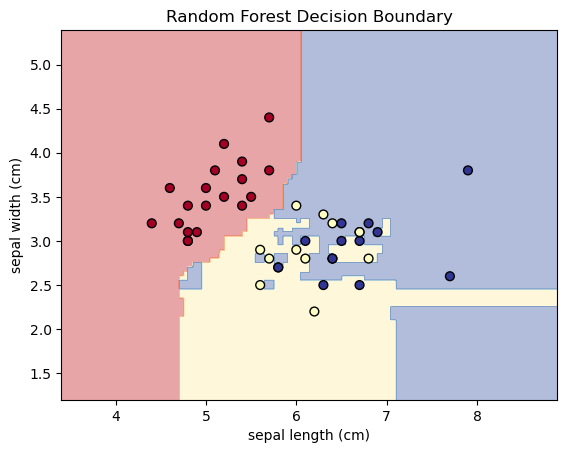

In [3]:
#Practical 2b 
#Aim:- Write a program to implement Decision Tree and Random forest with Prediction, Test Score and Confusion Matrix. 


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset and choose only two features for visualization (we'LL use the first two)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names). iloc[:, :2] # Only first two features
y = pd.DataFrame(iris.target, columns=['species'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    # Create a meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    # Predict for the entire grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values.ravel(), s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()
    
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions with Decision Tree
dt_predictions = dt_model.predict(X_test)

# Decision Tree Accuracy and Confusion Matrix
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Plot Confusion Matrix for Decision Tree
sns. heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt. show()

# Plot Decision Boundary for Decision Tree
plot_decision_boundary(dt_model, X_test, y_test, "Decision Tree Decision Boundary")

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions with Random Forest
rf_predictions = rf_model.predict(X_test)

# Random Forest Accuracy and Confusion Matrix
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Plot Confusion Matrix for Random Forest
sns. heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt. title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot Decision Boundary for Random Forest
plot_decision_boundary(rf_model, X_test, y_test, "Random Forest Decision Boundary")


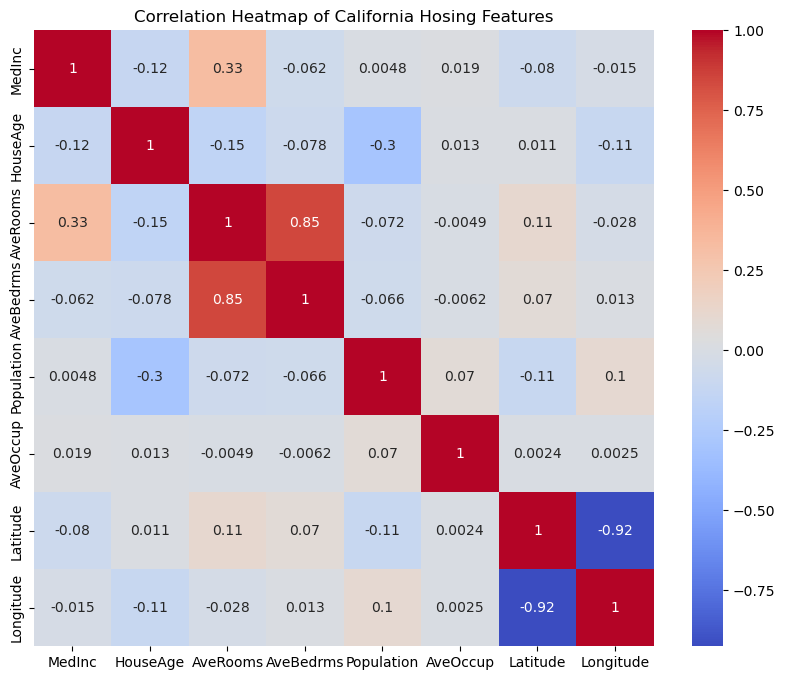

Training Mean Squared Error: 0.5233576288267755
Test Mean Squared Error: 0.530567782476675
Training R^2 Score: 0.6093459727972159
Test R^2 Score: 0.5957702326061666
             Coefficient
MedInc      4.458226e-01
HouseAge    9.681868e-03
AveRooms   -1.220951e-01
AveBedrms   7.785996e-01
Population -7.757404e-07
AveOccup   -3.370027e-03
Latitude   -4.185367e-01
Longitude  -4.336880e-01


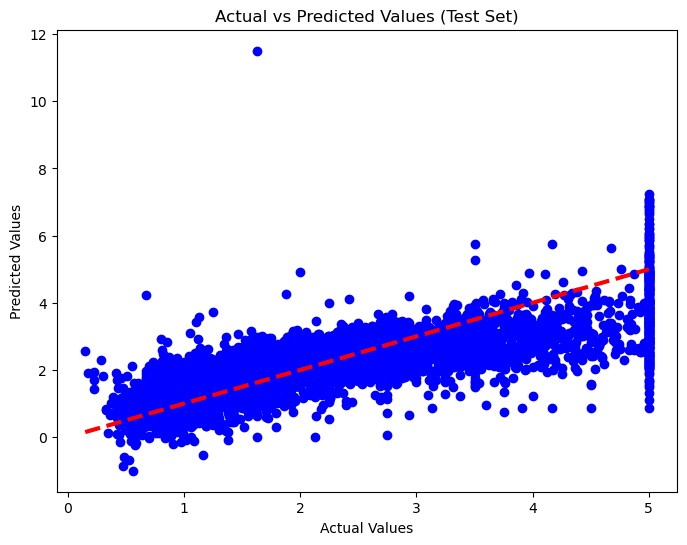

In [4]:
#Practical 2c - least square Regression 

#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
#Load California Hosuing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['MEDV'])
#Visualise dataset correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of California Hosing Features")
plt.show()
#Split the dataset into training and testingf sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Implement Least Squares Regression (Linear Regression)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
#Make predictions
y_train_pred = reg_model.predict(X_train)
y_test_pred = reg_model.predict(X_test)
#Generate relevant metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
#Print the results
print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
# Visualise regression coefficients
coefficients = pd.DataFrame(reg_model.coef_.T, X.columns, columns=['Coefficient'])
print(coefficients)
#Plot predicted vs actual values for test set
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.show()

Dataset Head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

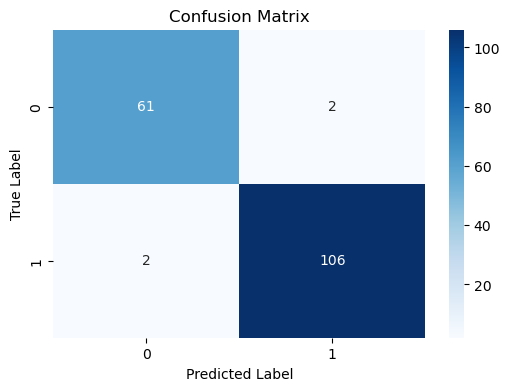


New Input for Prediction:
[[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
  9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
  1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
  2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
  3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
  1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
  1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
  2.90075571e-01 8.39458172e-02]]

Predicted class for the new input: malignant


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [5]:
# Practical 2d - LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

# Step 1: Load the inbuilt Breast Cancer dataset
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data. feature_names)# Features
y = pd.DataFrame(cancer_data. target, columns=['target'])# Target

# Step 2: Explore the dataset
print("Dataset Head:")
print(X.head()) # Preview the first few rows of the feature set

print("\nTarget Distribution:")
print(y['target'].value_counts()) # Distribution of the target variable (0 = malignant, 1 = benign)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implement Logistic Regression
logreg = LogisticRegression(max_iter=10000, random_state=42) # Increased max_iter to ensure convergence
logreg.fit(X_train, y_train.values.ravel()) # y_train must be passed as a flat array

# Step 5: Make predictions on the test set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 7: Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns. heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt. title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt. show()

# Step 8: Make a prediction on a new input sample
# Example: Let's create a new sample input (using the mean of features for simplicity)
# You can replace these values with actual feature values you'd Like to predict for

new_input = np.array([X.mean().values]) # Using the mean of the features as an example input

# Ensure the new input has the correct shape (1, n_features)
print(f"\nNew Input for Prediction:\n{new_input}")

# Make a prediction on the new input
new_prediction = logreg.predict(new_input)

# Get the predicted class (0 = malignant, 1 = benign)
predicted_class = 'benign' if new_prediction == 1 else 'malignant'
print(f"\nPredicted class for the new input: {predicted_class}")


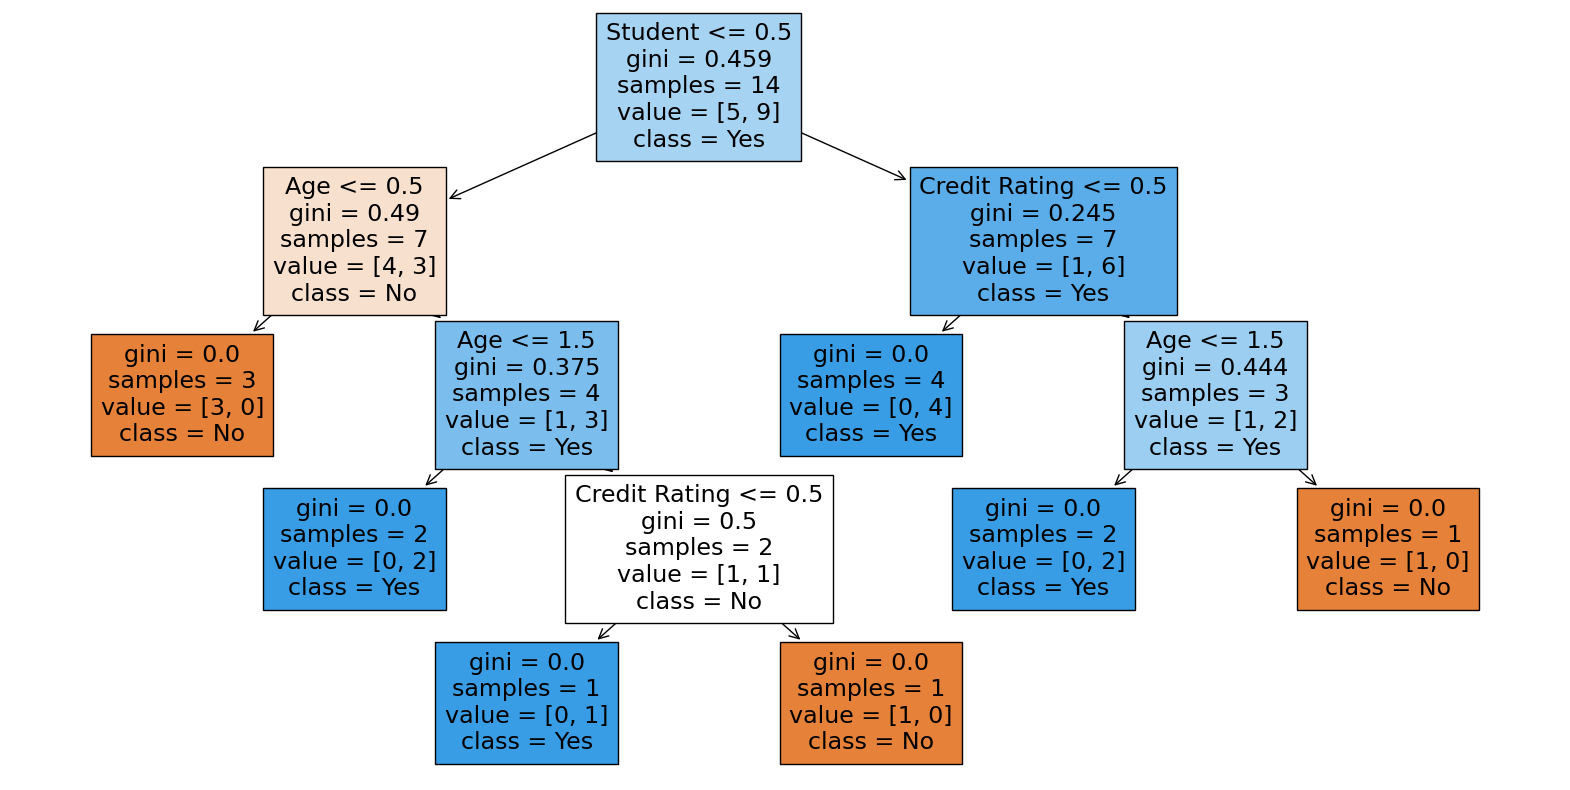

Decision tree splits and Gini impurities:
Node 0 (Gini: 0.4592): split on feature 'Student'
Node 1 (Gini: 0.4898): split on feature 'Age'
Node 2 (Gini: 0.0000): leaf node
Node 3 (Gini: 0.3750): split on feature 'Age'
Node 4 (Gini: 0.0000): leaf node
Node 5 (Gini: 0.5000): split on feature 'Credit Rating'
Node 6 (Gini: 0.0000): leaf node
Node 7 (Gini: 0.0000): leaf node
Node 8 (Gini: 0.2449): split on feature 'Credit Rating'
Node 9 (Gini: 0.0000): leaf node
Node 10 (Gini: 0.4444): split on feature 'Age'
Node 11 (Gini: 0.0000): leaf node
Node 12 (Gini: 0.0000): leaf node
Prediction for sklearn decision tree: Yes


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
#Practical 3a  - Decision tree IDE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree as sk_tree
# Step 1: Parse the dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent'],
    'Buys Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode the categorical variables
df_encoded = df.apply(lambda x: pd.factorize(x)[0])
# Fit the decision tree classifier using Gini impurity
clf_gini = sk_tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(df_encoded.iloc[:, :-1], df_encoded['Buys Computer'])
# Convert the feature names from Index to list
feature_names = df.columns[:-1].tolist()

# Convert the class names to a list
class_names = df['Buys Computer'].unique().tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))
sk_tree.plot_tree(clf_gini, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# Function to print Gini impurity and chosen attribute at each split
def print_gini_and_splits(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != sk_tree._tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("Decision tree splits and Gini impurities:")
    for i in range(tree_.node_count):
        if tree_.children_left[i] != sk_tree._tree.TREE_LEAF:
            print(f"Node {i} (Gini: {tree_.impurity[i]:.4f}): split on feature '{feature_name[i]}'")
        else:
            print(f"Node {i} (Gini: {tree_.impurity[i]:.4f}): leaf node")

print_gini_and_splits(clf_gini, feature_names)

# Example test sample
test_sample = {
    'Age': '<=30',
    'Income': 'Medium',
    'Student': 'Yes',
    'Credit Rating': 'Fair'
}
# Encode the test sample
encoded_sample = pd.DataFrame([test_sample]).apply(lambda x: pd.factorize(df[x.name])[0][df[x.name].tolist().index(x[0])])

# Predict using sklearn decision tree
sklearn_prediction = clf_gini.predict([encoded_sample])
decoded_prediction = pd.factorize(df['Buys Computer'])[1][sklearn_prediction[0]]
print("Prediction for sklearn decision tree:", decoded_prediction)


Sample Data:
   Age  Annual Income (k$)  Spending Score (1-100)  Segment
0   19                  15                      39        0
1   21                  15                      81        1
2   20                  16                       6        0
3   23                  16                      77        1
4   31                  17                      40        0

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Accuracy Score:
1.0

New User Data Prediction:
   Age  Annual Income (k$)  Spending Score (1-100)  Segment
0   27                  23                      60        1


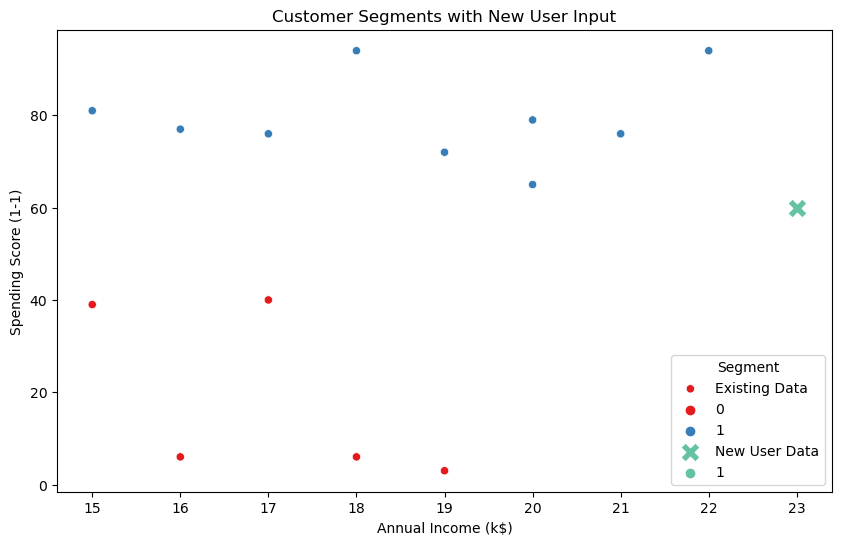

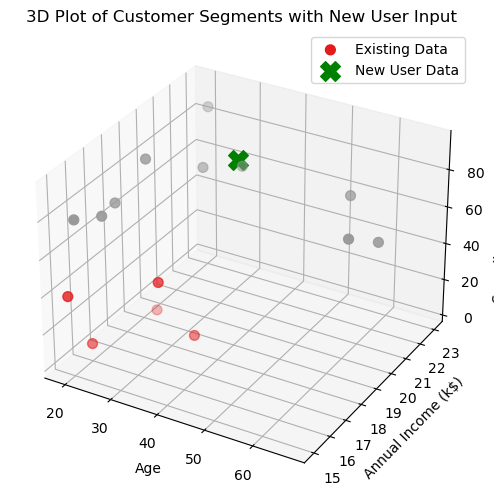

In [9]:
#Practical 3b  - KNN



# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
# Step 2: Load and display the sample data
data = {
    'Age': [19, 21, 20, 23, 31, 22, 35, 25, 23, 64, 30, 67, 35, 58, 24],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 79, 65, 76, 76, 94],
    'Segment': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]  # 0: Low-value, 1: High-value
}
df = pd.DataFrame(data)
print("Sample Data:")
print(df.head())

# Step 3: Data Preprocessing
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Segment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Apply KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Step 6: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
# Step 7: Classify new user input
new_user_data = {'Age': [27], 'Annual Income (k$)': [23], 'Spending Score (1-100)': [60]}
new_user_df = pd.DataFrame(new_user_data)
new_user_scaled = scaler.transform(new_user_df)

new_user_segment = knn.predict(new_user_scaled)
new_user_df['Segment'] = new_user_segment
print("\nNew User Data Prediction:")
print(new_user_df)

# Visualization: Scatter plot of the customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=df, palette='Set1', marker='o', label='Existing Data')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=new_user_df, palette='Set2', marker='X', s=200, label='New User Data')
plt.title('Customer Segments with New User Input')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-1)')
# Visualization: 3D plot for KNN decision boundaries and customer segments including new user input
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the existing data with original values
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y, cmap='Set1', s=50, label='Existing Data')

# Plot the new user input with original values
ax.scatter(new_user_df['Age'], new_user_df['Annual Income (k$)'], new_user_df['Spending Score (1-100)'], c='green', marker="X", s=200, label='New User Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Plot of Customer Segments with New User Input')
ax.legend()
plt.show()


Distance Metric: euclidean
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



Distance Metric: manhattan
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



Distance Metric: cheby

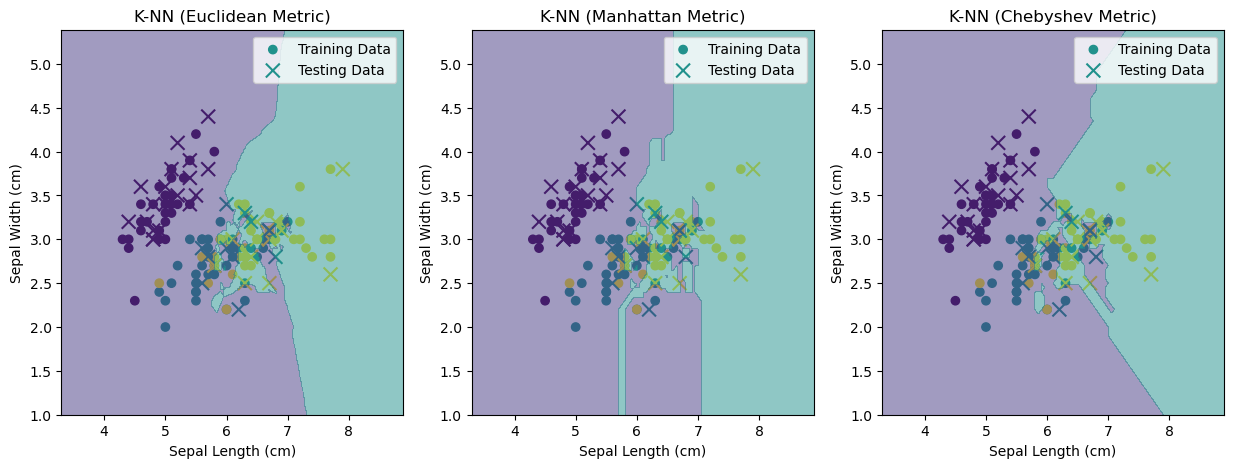

In [4]:
#Prac 3-c different Distance methods (Euclidean) with Prediction, Test Score and Confusion Matrix.


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix 
 
# Load the Iris dataset 
iris = load_iris() 
X = iris.data[:, :2]  # Select only the first two features (sepal length and sepal width) 
y = iris.target 
 
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Initialize k-NN classifier with different distance metrics 
k = 3 
 
# List of distance metrics to test 
distance_metrics = ['euclidean', 'manhattan', 'chebyshev'] 
 
# Create subplots for each distance metric 
fig, axes = plt.subplots(1, len(distance_metrics), figsize=(15, 5)) 
for i, metric in enumerate(distance_metrics): 
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric) 

 # Fit the classifier to the training data 
    knn_classifier.fit(X_train, y_train) 
    # Make predictions on the test data 
    y_pred = knn_classifier.predict(X_test) 
    # Evaluate the classifier's performance 
    print(f"Distance Metric: {metric}") 
    print("Confusion Matrix:") 
    print(confusion_matrix(y_test, y_pred)) 
    print("\nClassification Report:") 
    print(classification_report(y_test, y_pred)) 
    print("\n") 
 
    # Visualize the dataset and decision boundaries for the current metric 
    ax = axes[i] 
# Plot the training data points 
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data') 
 
    # Plot the testing data points 
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Testing Data') 
# Plot decision boundaries using the current metric 
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric) 
    knn_classifier.fit(X, y) 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.5, levels=range(4)) 
    ax.set_title(f'K-NN ({metric.capitalize()} Metric)') 
    ax.set_xlabel('Sepal Length (cm)') 
    ax.set_ylabel('Sepal Width (cm)') 
    ax.legend() 
plt.show()

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  3 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



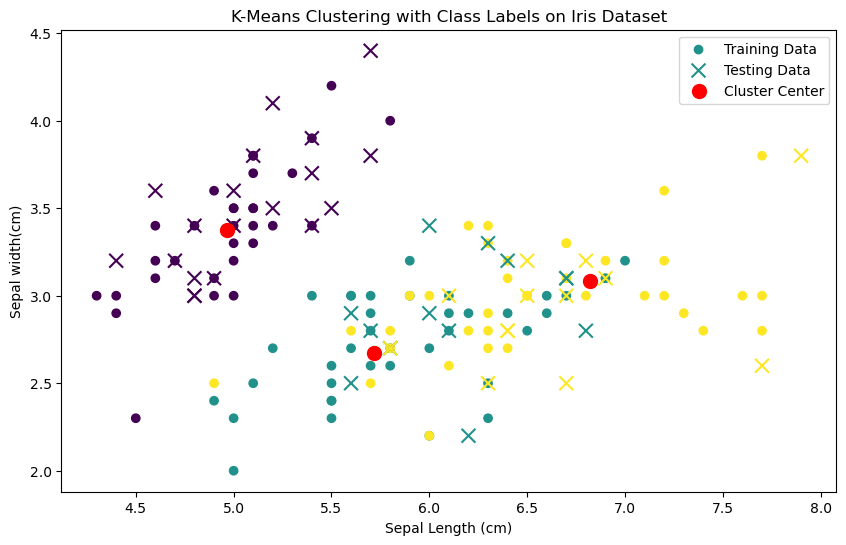

In [13]:
#K means Practical 3d

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X_train)

cluster_lables = kmeans.predict(X_test)

cluster_class_labels = []
for i in range(n_clusters):
    cluster_indices = np.where(cluster_lables == i) [0]
    cluster_class_labels.append(np.bincount(y_test[cluster_indices]).argmax())

y_pred = np.array([cluster_class_labels[cluster_lables[i]] for i in range(len(X_test))])

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

plt.figure(figsize=(10,6))

plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='viridis', label = 'Training Data')

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis', marker='x', s=100, label='Testing Data')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker = 'o', s=100, label='Cluster Center')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width(cm)')
plt.title('K-Means Clustering with Class Labels on Iris Dataset')
plt.legend()
plt.show()


Cluster Descriptions (Ward Linkage):
Clusters based on Ward linkage intrepretation.
Cluster Descriptions (Single Linkage):
Clusters based on Single Linkage interpretation
Cluster Descriptions (Complete Linkage):
Clusters based on Complete linkage interpretation
Accuracy: 0.7666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  4  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.67      0.63         9
           2       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



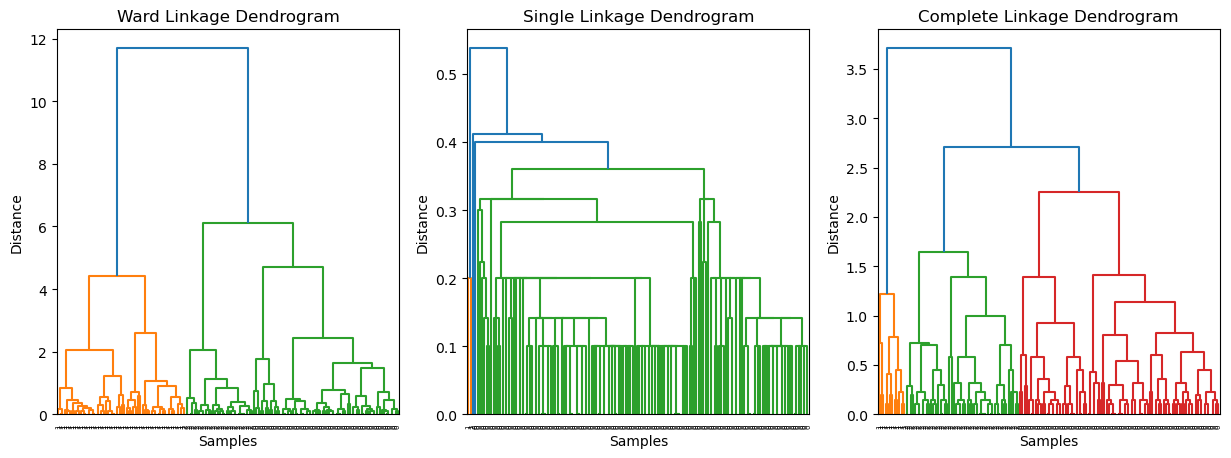

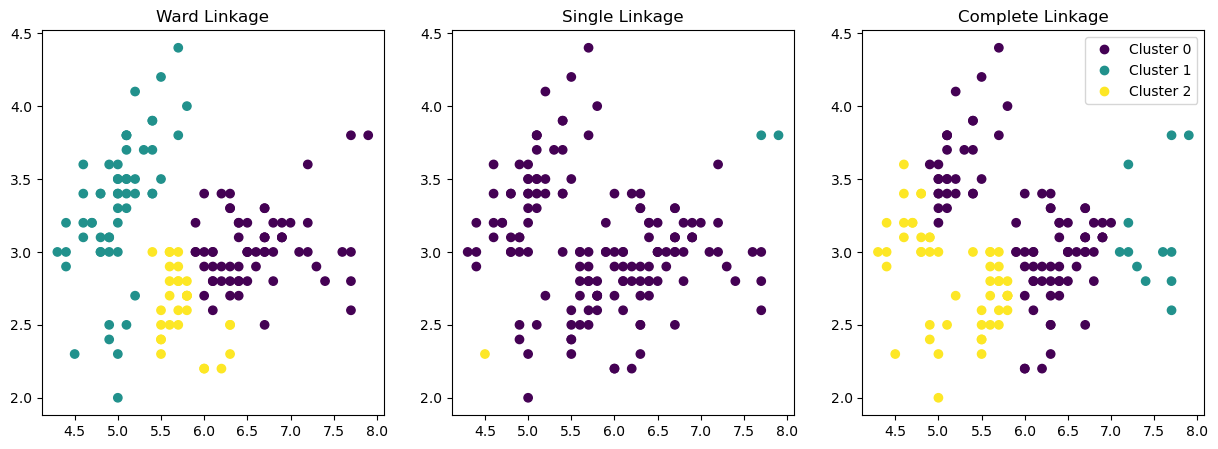

In [15]:
#hierarchical clustering- prac 4a

import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

n_clusters = 3

linkage_methods = ['ward','single','complete']
cluster_labels = []

plt.figure(figsize=(15,5))
dendrogram_axes = []

for i, linkage_method in enumerate(linkage_methords):
    labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit_predict(X)
    cluster_labels.append(labels)

    dendrogram_data = linkage(X, method=linkage_method)
    dendrogram_axes.append(plt.subplot(1,len(linkage_methods),i+1))
    dendrogram(dendrogram_data, orientation='top', labels = labels)
    plt.title(f"{linkage_method.capitalize()} Linkage Dendrogram")
    plt.xlabel('Samples')
    plt.ylabel('Distance')


plt.figure(figsize=(15,5))
for i, linkage_method in enumerate(linkage_methords):
    plt.subplot(1, len(linkage_methods), i + 1)
    scatter = plt.scatter(X[:,0], X[:,1], c=cluster_labels[i], cmap='viridis',
                            label=f'Clusters ({linkage_method.capitalize()} Linkage)')
    plt.title(f"{linkage_method.capitalize()} Linkage")

plt.legend(handles=scatter.legend_elements () [0], labels=[f'Cluster {i}' for i in range(n_clusters)])

X_with_cluster = np.column_stack((X,cluster_labels[-1]))

X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size =0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred, zero_division=0)

cluster_descriptions = {
    'ward' : 'Clusters based on Ward linkage intrepretation.',
    'single' : 'Clusters based on Single Linkage interpretation',
    'complete' : 'Clusters based on Complete linkage interpretation'
}

for method in linkage_methods:
    print(f"Cluster Descriptions ({method.capitalize()} Linkage):")
    print(cluster_descriptions[method.lower()])  # Convert to lowercase for dictionary access

# Print accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.show()


In [19]:
#rule based - Practical 4b 


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
#Split the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
#Define a simple rule-based classifier function
def rule_based_classifier(x):
    if x[2] < 2.0:
        rule = "If feature 2 < 2.0, assign to Classd 0"
        return 0 # Class 0
    elif x[3] > 1.5:
        rule = "If feature 2 >= 2.0 and feature 3 > 1.5, assign to Class 2"
        return 2 # Class 2
    else:
        rule = "If feature 2 >= 2.0 and feature 3 <=1.5, assign to Class 1"
        return 1 # Class 1
    print("Rule:", rule)
# Apply the rule-based classifier to make predictions on the test set
y_pred = [rule_based_classifier(x) for x in X_test]
# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,
target_names=iris.target_names)
# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



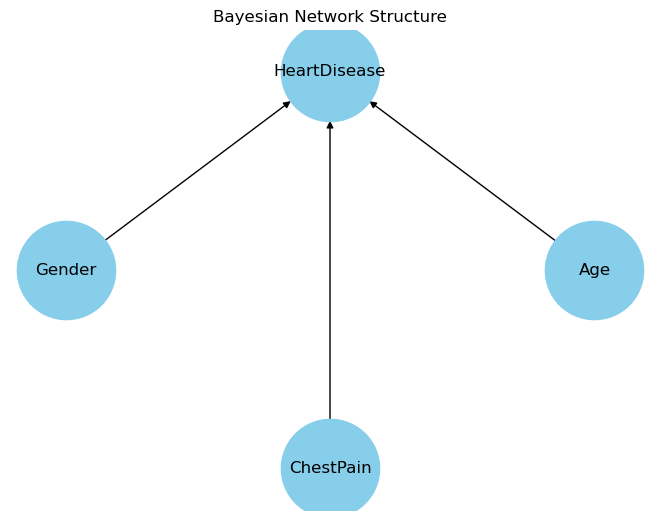

CPD of Age
+---------+-----+
| Age(30) | 0.2 |
+---------+-----+
| Age(40) | 0.2 |
+---------+-----+
| Age(50) | 0.2 |
+---------+-----+
| Age(60) | 0.2 |
+---------+-----+
| Age(70) | 0.2 |
+---------+-----+
CPD of HeartDisease
+-------------------+---------------------+-----+--------------------+--------------------+
| Age               | Age(30)             | ... | Age(70)            | Age(70)            |
+-------------------+---------------------+-----+--------------------+--------------------+
| ChestPain         | ChestPain(Atypical) | ... | ChestPain(Typical) | ChestPain(Typical) |
+-------------------+---------------------+-----+--------------------+--------------------+
| Gender            | Gender(Female)      | ... | Gender(Female)     | Gender(Male)       |
+-------------------+---------------------+-----+--------------------+--------------------+
| HeartDisease(No)  | 0.5                 | ... | 0.5                | 0.0                |
+-------------------+--------------

In [23]:
#bayesian network - Practical 4c 

#pip install pgmpy


import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator,MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
data = pd.DataFrame (data={'Age': [30, 40, 50, 60, 70],
                           'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
                           'ChestPain': ['Typical', 'Atypical', 'Typical', 'Atypical','Typical'],
                           'HeartDisease': ['Yes', 'No', 'Yes', 'No', 'Yes']})
model = BayesianNetwork([('Age', 'HeartDisease'),
                         ('Gender', 'HeartDisease'),
                         ('ChestPain', 'HeartDisease')])
model.fit(data, estimator=MaximumLikelihoodEstimator)
pos = nx.circular_layout(model)
nx.draw(model, pos, with_labels=True, node_size=5000,node_color="skyblue", font_size=12, font_color="black")
plt.title("Bayesian Network Structure")
plt.show()

for cpd in model.get_cpds():
    print("CPD of", cpd.variable)
    print(cpd)
inference = VariableElimination(model)
query = inference.query(variables=['HeartDisease'], evidence={'Age':50,'Gender': 'Male', 'ChestPain': 'Typical'})
print(query)

In [22]:
pip install pgmpy


  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/c7/e6/e451590c2341b3d59d7b613e1af80daefd9e2873f7c9ad3d498ad84e7f44/pgmpy-0.1.26-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5a/6a/775b93d6888c31f1f1fc457e4f5cc89f0984412d5dcdef792b8f2aa6e812/torch-2.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opt-einsum from https://files.pythonhosted.org/packages/23/cd/066e86230ae37ed0be70aae89aabf03ca8d9f39c8aea0dec8029455b5540/opt_einsum-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-generativeai from https://files.pythonhosted.org/packages/e9/2f/b5c1d62e94409ed98d5425e83b8e6d3dd475b611be272f561b1a545d273a/google_generativeai-0.8.3-py3-none-any.whl.metadata
  Obtaining dependency information for google-ai-generativelanguage==0.6.10 from https://files.pythonhosted.org/packages/af/6d/db99a295f9caf027bbdd90c41e6ea650a7468392a0e8

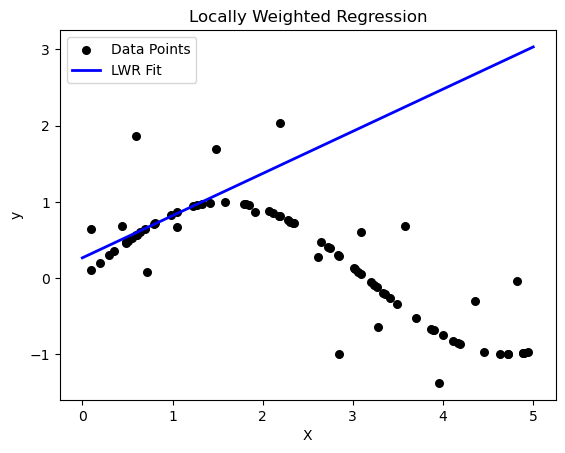

In [25]:
#Practical 4d - non-parametric Locally Weighted Regression

import numpy as np
import matplotlib.pyplot as plt
# Seed for reproducibility
np.random.seed(0)
# Generate random dataset
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))
# Locally Weighted Regression function
def locally_weighted_regression(query_point, X, y, tau=0.1):
    m = X.shape[0]
    # Calculate weights
    weights = np.exp(-((X - query_point) * 2).sum(axis=1) / (2 * tau * 2))
    W = np.diag(weights)
    # Add bias term to X
    X_bias = np.c_[np.ones((m, 1)), X]

    # Calculate theta using weighted least squares
    theta = np.linalg.inv(X_bias.T.dot(W).dot(X_bias)).dot(X_bias.T).dot(W).dot(y)

    # Predict for query_point
    x_query = np.array([1, query_point])
    prediction = x_query.dot(theta)
    return prediction
# Generate test points
X_test = np.linspace(0, 5, 100)
# Predict using locally weighted regression
predictions = [locally_weighted_regression(query_point, X, y, tau=0.1) for
query_point in X_test]
# Plot results
plt.scatter(X, y, color='black', s=30, marker='o', label='Data Points')
plt.plot(X_test, predictions, color='blue', linewidth=2, label='LWR Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()


Input: [0 0], Actual: [0], Predicted: [0.]
Input: [0 1], Actual: [1], Predicted: [1.]
Input: [1 0], Actual: [1], Predicted: [1.]
Input: [1 1], Actual: [0], Predicted: [0.]


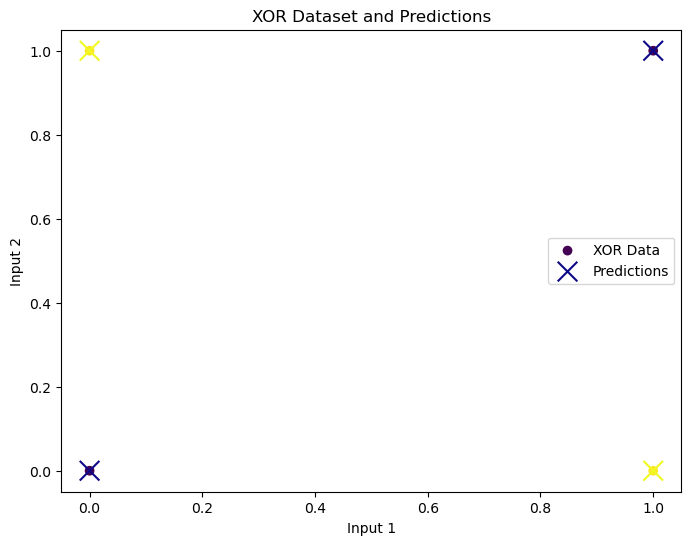

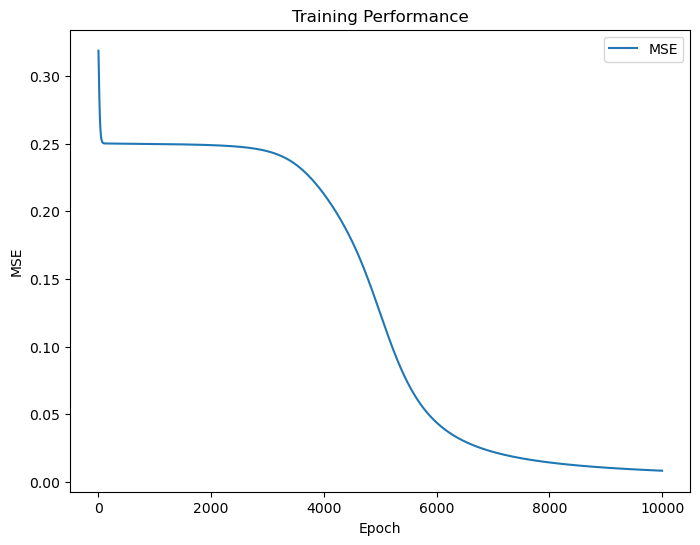

In [1]:
#Practical 1 EXTRA 
#Aim:- XOR NEURAL NETWORKS 

import numpy as np 
import matplotlib.pyplot as plt 
 
# Sigmoid activation function and its derivative 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): 
    return x * (1 - x) 
 
# Define the neuralNetwork class 
class NeuralNetwork: 
    def __init__(self, input_size, hidden_size, output_size): 
        #Initialize weights with random values 
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size)) 
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size)) 
         
    def forward(self, X): 
        #Forward propagation 
        self.hidden_input = np.dot(X, self.weights_input_hidden) 
        self.hidden_output = sigmoid(self.hidden_input) 
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output)) 
        return self.output 
     
    def backward(self, X, y, learning_rate): 
        #Backpropagation 
        error_output = y-self.output 
        delta_output = error_output * sigmoid_derivative(self.output) 
         
        error_hidden = delta_output.dot(self.weights_hidden_output.T) 
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_output)
        self.weights_hidden_output += self.hidden_output.T.dot(delta_output) * learning_rate 
        self.weights_input_hidden += X.T.dot(delta_hidden) * learning_rate 
         
    def train(self, X, y, learning_rate, epochs): 
        self.loss_history = [] #Track loss dusring training 
        for _ in range(epochs): 
            output = self.forward(X) 
            error = y-output 
            self.loss_history.append(np.mean(error**2)) #Track MSE 
            self.backward(X, y, learning_rate) 
             
    def predict(self, X): 
        return self.forward(X) 
     
#XOR dataset 
X = np.array([[0, 0], [0, 1], [1, 0],[1, 1]]) 
y = np.array([[0], [1], [1], [0]]) 
 
#Initalize and train the neural network 
input_size = 2 
hidden_size = 4 
output_size = 1 
learning_rate = 0.1 
epochs = 10000 
 
nn = NeuralNetwork(input_size, hidden_size, output_size) 
nn.train(X, y, learning_rate, epochs)
#Make predictions 
predictions = nn.predict(X) 
 
#Plot the XOR dataset and predictions 
plt.figure(figsize=(8, 6)) 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', label='XOR Data') 
plt.scatter(X[:,0], X[:,1], c=np.round(predictions), cmap='plasma', marker='x', 
s=200, label='Predictions') 
plt.title('XOR Dataset and Predictions') 
plt.xlabel('Input 1') 
plt.ylabel('Input 2') 
plt.legend() 
 
#PLot the performance (MSE) during training 
plt.figure(figsize=(8,6)) 
plt.plot(nn.loss_history, label='MSE') 
plt.title('Training Performance') 
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
plt.legend() 
 
# Print predictions and actual values 
for i in range(len(X)): 
    print(f"Input: {X[i]}, Actual: {y[i]}, Predicted: {np.round(predictions[i])}") 
plt.show() 

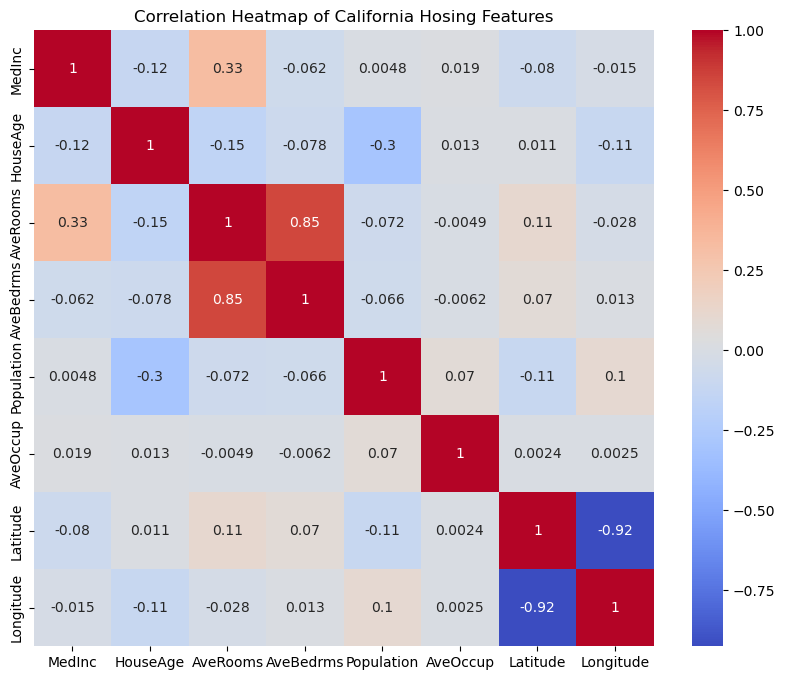

Training Mean Squared Error: 0.5233576288267755
Test Mean Squared Error: 0.530567782476675
Training R^2 Score: 0.6093459727972159
Test R^2 Score: 0.5957702326061666
             Coefficient
MedInc      4.458226e-01
HouseAge    9.681868e-03
AveRooms   -1.220951e-01
AveBedrms   7.785996e-01
Population -7.757404e-07
AveOccup   -3.370027e-03
Latitude   -4.185367e-01
Longitude  -4.336880e-01


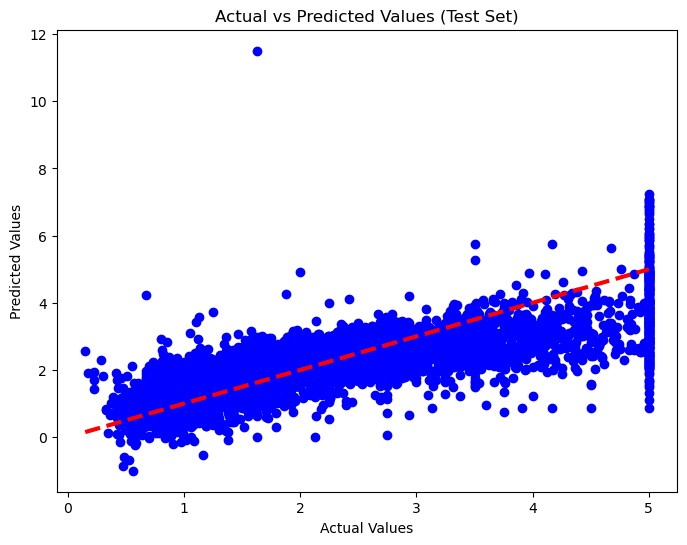

In [2]:
#Practical 2 Extra 
#Aim:- Linear Regression 

#Import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing 
 
#Load California Hosuing dataset 
housing = fetch_california_housing() 
X = pd.DataFrame(housing.data, columns=housing.feature_names) 
y = pd.DataFrame(housing.target, columns=['MEDV']) 
 
#Visualise dataset correlation heatmap 
plt.figure(figsize=(10, 8)) 
sns.heatmap(X.corr(), annot=True, cmap='coolwarm') 
plt.title("Correlation Heatmap of California Hosing Features") 
plt.show() 
 
#Split the dataset into training and testingf sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42) 
 
#Implement Least Squares Regression (Linear Regression) 
reg_model = LinearRegression() 
reg_model.fit(X_train, y_train) 
 
#Make predictions 
y_train_pred = reg_model.predict(X_train) 
y_test_pred = reg_model.predict(X_test) 
 
#Generate relevant metrics 
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred) 
train_r2 = r2_score(y_train, y_train_pred) 
test_r2 = r2_score(y_test, y_test_pred) 
 
#Print the results 
 
print(f"Training Mean Squared Error: {train_mse}") 
print(f"Test Mean Squared Error: {test_mse}") 
print(f"Training R^2 Score: {train_r2}") 
print(f"Test R^2 Score: {test_r2}") 
 
# Visualise regression coefficients 
coefficients = pd.DataFrame(reg_model.coef_.T, X.columns, 
columns=['Coefficient']) 
print(coefficients) 
 
#Plot predicted vs actual values for test set 
plt.figure(figsize=(8,6)) 
plt.scatter(y_test, y_test_pred, c='blue') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=3) 
plt.xlabel("Actual Values") 
plt.ylabel("Predicted Values") 
plt.title("Actual vs Predicted Values (Test Set)") 
plt.show()